In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import random

from sklearn.neighbors import KNeighborsClassifier

#plot
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from matplotlib.axes import Axes

In [11]:
def cal_score (y_pred,y_val):
    n11 = 0
    n12 = 0
    n21 = 0
    n22 = 0
    y_pred_array= np.array(y_pred)
    y_val_array= np.array(y_val)
    for j in range(len(y_pred_array)):
        if (y_pred_array[j]==2)&(y_val_array[j]==2):
            n22 = n22+1
        elif (y_pred_array[j]==1)&(y_val_array[j]==2):
            n12 = n12 +1
        elif (y_pred_array[j]==2)&(y_val_array[j]==1):
            n21 = n21+1
        else:
            n11 = n11+1 
    try:       
        Precall = n22 / ( n12 + n22)
        Pprecision = n22 / ( n21 + n22)
        f1_score = 2 / (1/Precall + 1/Pprecision)
        FPR = n21/(n21 + n11)
        FNR = n12/(n12 +n22 )
        BER = 1/2*(FPR+FNR)
        #print ("n11:.."+str(n11)+"..n12:.."+str(n12)+"..n21:.."+str(n21)+"..n22:.."+str(n22))
        #print ("TPR:"+str(Precall))
        #print ("f1 score:" + str(f1_score))
        #print ("FPR:"+ str(FPR))
        #print ("BER:" + str(BER))
        return Precall,f1_score,BER,FPR
    except Exception as ex:
        print ("divided by zero, just skip")
        return 0,0,0,0

In [59]:
X_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_boundarysel_50pergroup.csv")
y_train=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_boundarysel_50pergroup.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_train = X_train.drop(["predict_cluster"],axis=1)
y_train = y_train.drop(["predict_cluster"],axis=1)
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [65]:
def parameter_adjust (X_train,y_train):
    start=time.time()
    k_value=5
    K_list = []
    tp_list = []
    fp_list = []
    BER_list = []
    f1_score_list = []
    time_list=[]
    while (k_value<300):
        start1=time.time()
        neigh = KNeighborsClassifier(n_neighbors=k_value,algorithm='auto',weights ='distance')
        neigh.fit(X_train, y_train['label'])
        y_pred = neigh.predict(X_val)
        y_pred = {"label_pred":y_pred}
        y_pred = pd.DataFrame(data=y_pred)
        Precall,f1_score,BER,FPR = cal_score (y_pred,y_val['label']) 
        K_list.append(k_value)
        tp_list.append(Precall)
        fp_list.append(FPR)
        BER_list.append(BER)
        f1_score_list.append(f1_score)
        temp=(time.time()-start1)/60
        time_list.append(temp)
        print("current k_value:%d ,fit time:%5.1fminute"%(k_value,(time.time()-start1)/60))
        if (k_value<=20):
            k_value=k_value+1
        else:
            k_value=k_value+3
        print("                 ")
    print("the total executing time:%5.1fminute"%((time.time()-start)/60))
    return tp_list, fp_list, BER_list, f1_score_list,K_list,time_list

In [13]:
tpr_list_50pergroup,fpr_list_50pergroup,BER_list_50pergroup, f1_score_list_50pergroup,K_list,time_list = parameter_adjust (X_train,y_train)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [18]:
boundarysel_50persummary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_50pergroup,'fpr':fpr_list_50pergroup,'BER':BER_list_50pergroup,'f1_score':f1_score_list_50pergroup}
boundarysel_50persummary = pd.DataFrame(data=boundarysel_50persummary)

In [20]:
boundarysel_50persummary 
boundarysel_50persummary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_boundarysel_50persummary.csv",index=True)

In [26]:
#function plot the ROC
def plot_roc_curve(fpr, tpr, color,label):
    plt.plot(fpr, tpr, linewidth=2,color=color,label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

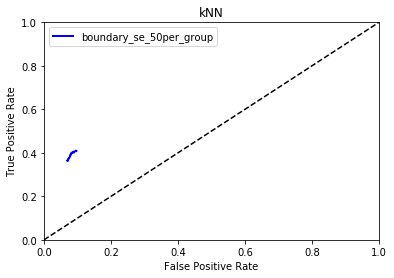

In [27]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group')
plt.show()

In [60]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],40000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],40000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label = pd.DataFrame(train_com['label'])
sample_feature=train_com.drop(["label"],axis=1)

In [66]:
tpr_list_50pergroup_balanced_choice,fpr_list_50pergroup_balanced_choice,BER_list_50pergroup_balanced_choice, f1_score_list_50pergroup_balanced_choice,K_list,time_list = parameter_adjust (sample_feature,sample_label)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [67]:
boundarysel_50per_balanced_choice_summary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_50pergroup_balanced_choice,'fpr':fpr_list_50pergroup_balanced_choice,'BER':BER_list_50pergroup_balanced_choice,'f1_score':f1_score_list_50pergroup_balanced_choice}
boundarysel_50per_balanced_choice_summary = pd.DataFrame(data=boundarysel_50per_balanced_choice_summary)

In [69]:
boundarysel_50per_balanced_choice_summary
boundarysel_50per_balanced_choice_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_boundarysel_50persummary_balanced_choice.csv",index=True)

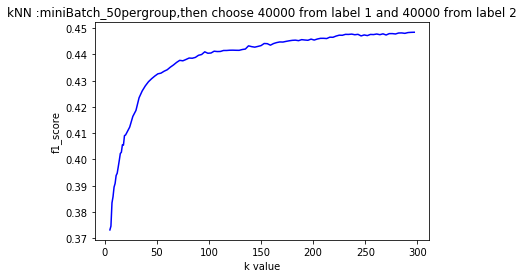

In [74]:
plt.title("kNN :miniBatch_50pergroup,then choose 40000 from label 1 and 40000 from label 2")
plt.plot(K_list,f1_score_list_50pergroup_balanced_choice,"b-")
plt.xlabel('k value')
plt.ylabel('f1_score')
plt.show()

In [ ]:
boundarysel_50per_balanced_choice_summary

In [ ]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group')
plot_roc_curve(fpr_list_50pergroup_balanced_choice,tpr_list_50pergroup_balanced_choice,color='y',label='choice 40000 from label 1 and label 2')
plt.show()

In [32]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],80000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],40000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label_2 = pd.DataFrame(train_com['label'])
sample_feature_2=train_com.drop(["label"],axis=1)

In [33]:
tpr_list_50pergroup_unbalanced_choice,fpr_list_50pergroup_unbalanced_choice,BER_list_50pergroup_unbalanced_choice, f1_score_list_50pergroup_unbalanced_choice,K_list,time_list = parameter_adjust (sample_feature_2,sample_label_2)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [34]:
boundarysel_50per_unbalanced_choice_summary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_50pergroup_unbalanced_choice,'fpr':fpr_list_50pergroup_unbalanced_choice,'BER':BER_list_50pergroup_unbalanced_choice,'f1_score':f1_score_list_50pergroup_unbalanced_choice}
boundarysel_50per_unbalanced_choice_summary = pd.DataFrame(data=boundarysel_50per_unbalanced_choice_summary)

In [35]:
boundarysel_50per_unbalanced_choice_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_boundarysel_50persummary_unbalanced_choice.csv",index=True)
boundarysel_50per_unbalanced_choice_summary

,BER,K_value,f1_score,fpr,time,tpr
0,0.322556,5,0.391560,0.161665,0.076187,0.516553
1,0.319963,6,0.395632,0.159541,0.079549,0.519615
2,0.317377,7,0.401634,0.153234,0.093175,0.518481
3,0.314777,8,0.405749,0.151323,0.097866,0.521769
4,0.315157,9,0.407085,0.147548,0.101075,0.517234
5,0.314220,10,0.408957,0.146127,0.091304,0.517687
6,0.314558,11,0.409655,0.143856,0.089471,0.514739
7,0.313663,12,0.411347,0.142745,0.090895,0.515420
8,0.312289,13,0.413680,0.141585,0.096430,0.517007
9,0.312007,14,0.414799,0.140115,0.096465,0.516100


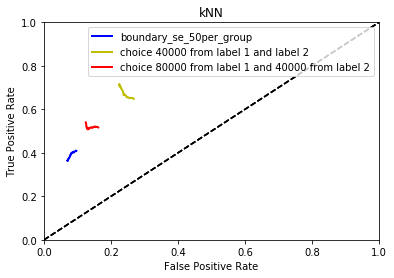

In [36]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group')
plot_roc_curve(fpr_list_50pergroup_balanced_choice,tpr_list_50pergroup_balanced_choice,color='y',label='choice 40000 from label 1 and label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice,tpr_list_50pergroup_unbalanced_choice,color='r',label='choice 80000 from label 1 and 40000 from label 2')
plt.show()

In [38]:
#select some of the data randomly
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class1_sample =pd.DataFrame.sample(train[train['label']==1],30000)
Class2_sample =pd.DataFrame.sample(train[train['label']==2],40000)
res = [Class1_sample, Class2_sample]
train_com = pd.concat(res)
sample_label_3 = pd.DataFrame(train_com['label'])
sample_feature_3=train_com.drop(["label"],axis=1)

In [39]:
tpr_list_50pergroup_unbalanced_choice_2,fpr_list_50pergroup_unbalanced_choice_2,BER_list_50pergroup_unbalanced_choice_2, f1_score_list_50pergroup_unbalanced_choice_2,K_list,time_list = parameter_adjust (sample_feature_3,sample_label_3)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [40]:
boundarysel_50per_unbalanced_choice_2_summary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_50pergroup_unbalanced_choice_2,'fpr':fpr_list_50pergroup_unbalanced_choice_2,'BER':BER_list_50pergroup_unbalanced_choice_2,'f1_score':f1_score_list_50pergroup_unbalanced_choice_2}
boundarysel_50per_unbalanced_choice_2_summary = pd.DataFrame(data=boundarysel_50per_unbalanced_choice_2_summary)

In [41]:
boundarysel_50per_unbalanced_choice_2_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_boundarysel_50persummary_unbalanced_choice_2.csv",index=True)
boundarysel_50per_unbalanced_choice_2_summary

,BER,K_value,f1_score,fpr,time,tpr
0,0.310421,5,0.357033,0.318575,0.057153,0.697732
1,0.309071,6,0.358432,0.317349,0.060470,0.699206
2,0.301686,7,0.366340,0.309948,0.064844,0.706576
3,0.299911,8,0.368367,0.307759,0.064470,0.707937
4,0.294687,9,0.373791,0.303772,0.073177,0.714399
5,0.294355,10,0.374502,0.302090,0.073361,0.713379
6,0.294390,11,0.374832,0.300685,0.071219,0.711905
7,0.293213,12,0.375978,0.300145,0.082640,0.713719
8,0.291145,13,0.377970,0.299296,0.075170,0.717007
9,0.288701,14,0.380425,0.297923,0.078129,0.720522


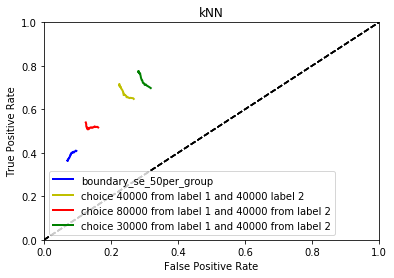

In [43]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group')
plot_roc_curve(fpr_list_50pergroup_balanced_choice,tpr_list_50pergroup_balanced_choice,color='y',label='choice 40000 from label 1 and 40000 label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice,tpr_list_50pergroup_unbalanced_choice,color='r',label='choice 80000 from label 1 and 40000 from label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice_2,tpr_list_50pergroup_unbalanced_choice_2,color='g',label='choice 30000 from label 1 and 40000 from label 2')
plt.show()

In [44]:
#double the data of class label 2
train = {'feature0':X_train['feature0'],'feature1':X_train['feature1'],'feature2':X_train['feature2'],'feature3':X_train['feature3'],'feature4':X_train['feature4'],'label':y_train['label']}
train = pd.DataFrame(data=train)
Class2_data =train[train['label']==2]
train = [train,Class2_data]
train = pd.concat(train)
train_double_label = pd.DataFrame(train['label'])
train_double_feature = train.drop(["label"],axis=1)

In [45]:
tpr_list_50pergroup_double,fpr_list_50pergroup_double,BER_list_50pergroup_double, f1_score_list_50pergroup_double,K_list,time_list = parameter_adjust (train_double_feature,train_double_label)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [53]:
boundarysel_50per_double_summary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_50pergroup_double,'fpr':fpr_list_50pergroup_double,'BER':BER_list_50pergroup_double,'f1_score':f1_score_list_50pergroup_double}
boundarysel_50per_double_summary = pd.DataFrame(data=boundarysel_50per_double_summary)

In [49]:
boundarysel_50per_double_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_boundarysel_50persummary_double.csv",index=True)
boundarysel_50per_double_summary

,BER,K_value,f1_score,fpr,time,tpr
0,0.326882,5,0.387600,0.158413,0.087601,0.504649
1,0.322262,6,0.391356,0.163004,0.086945,0.518481
2,0.316184,7,0.390554,0.182708,0.090799,0.550340
3,0.318621,8,0.395386,0.163886,0.095621,0.526644
4,0.317578,9,0.403255,0.149215,0.100230,0.514059
5,0.314380,10,0.406240,0.151323,0.111623,0.522562
6,0.311997,11,0.404966,0.160276,0.118200,0.536281
7,0.312388,12,0.408713,0.151306,0.115345,0.526531
8,0.311978,13,0.412600,0.144477,0.119674,0.520522
9,0.310130,14,0.414147,0.145996,0.120633,0.525737


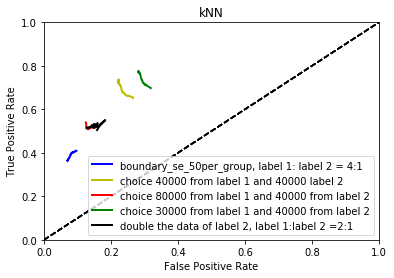

In [77]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group, label 1: label 2 = 4:1 ')
plot_roc_curve(fpr_list_50pergroup_balanced_choice,tpr_list_50pergroup_balanced_choice,color='y',label='choice 40000 from label 1 and 40000 label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice,tpr_list_50pergroup_unbalanced_choice,color='r',label='choice 80000 from label 1 and 40000 from label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice_2,tpr_list_50pergroup_unbalanced_choice_2,color='g',label='choice 30000 from label 1 and 40000 from label 2')
plot_roc_curve(fpr_list_50pergroup_double,tpr_list_50pergroup_double,color='k',label='double the data of label 2, label 1:label 2 =2:1 ')
plt.show()

In [51]:
#IMPORT CNN
X_train_CNN=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_x_resample3000_CNN.csv")
y_train_CNN=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\train_y_resample3000_CNN.csv")
X_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\lab; signal processing\\forStudents\\medData\\validation_label.csv")
X_val = X_val.drop(["Unnamed: 0"],axis=1)
y_val = y_val.drop(["Unnamed: 0"],axis=1)

In [70]:
tpr_list_CNN,fpr_list_CNN,BER_list_CNN, f1_score_list_CNN,K_list,time_list = parameter_adjust (X_train_CNN,y_train_CNN)

current k_value:5 ,fit time:  0.1minute
                 
current k_value:6 ,fit time:  0.1minute
                 
current k_value:7 ,fit time:  0.1minute
                 
current k_value:8 ,fit time:  0.1minute
                 
current k_value:9 ,fit time:  0.1minute
                 
current k_value:10 ,fit time:  0.1minute
                 
current k_value:11 ,fit time:  0.1minute
                 
current k_value:12 ,fit time:  0.1minute
                 
current k_value:13 ,fit time:  0.1minute
                 
current k_value:14 ,fit time:  0.1minute
                 
current k_value:15 ,fit time:  0.1minute
                 
current k_value:16 ,fit time:  0.1minute
                 
current k_value:17 ,fit time:  0.1minute
                 
current k_value:18 ,fit time:  0.1minute
                 
current k_value:19 ,fit time:  0.1minute
                 
current k_value:20 ,fit time:  0.1minute
                 
current k_value:21 ,fit time:  0.1minute
                 
cu

In [71]:
CNN_summary = {'K_value':K_list,'time':time_list,'tpr':tpr_list_CNN,'fpr':fpr_list_CNN,'BER':BER_list_CNN,'f1_score':f1_score_list_CNN}
CNN_summary = pd.DataFrame(data=CNN_summary)

In [72]:
CNN_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_CNN.csv",index=True)
CNN_summary

,BER,K_value,f1_score,fpr,time,tpr
0,0.342476,5,0.394921,0.097538,0.059719,0.412585
1,0.343575,6,0.394624,0.094973,0.063661,0.407823
2,0.341169,7,0.399537,0.092882,0.063990,0.410544
3,0.341275,8,0.400289,0.091280,0.067729,0.408730
4,0.338736,9,0.404917,0.090169,0.079281,0.412698
5,0.339701,10,0.404209,0.088813,0.091290,0.409410
6,0.338339,11,0.406630,0.088356,0.105420,0.411678
7,0.337783,12,0.408255,0.087131,0.089029,0.411565
8,0.338009,13,0.408039,0.086902,0.108304,0.410884
9,0.337348,14,0.409836,0.085693,0.109366,0.410998


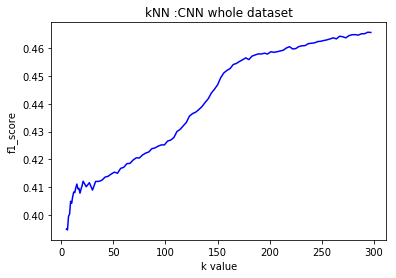

In [75]:
plt.title("kNN :CNN whole dataset")
plt.plot(K_list,f1_score_list_CNN,"b-")
plt.xlabel('k value')
plt.ylabel('f1_score')
plt.show()

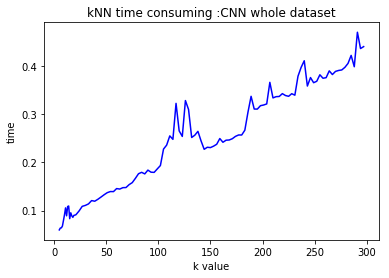

In [76]:
plt.title("kNN time consuming :CNN whole dataset")
plt.plot(K_list,time_list,"b-")
plt.xlabel('k value')
plt.ylabel('time')
plt.show()

In [112]:
len(y_train_CNN)

79661

In [85]:
len(y_train_CNN[y_train_CNN['label']==1])

53847

In [86]:
len(y_train_CNN[y_train_CNN['label']==2])

25814

In [88]:
train_CNN = {'feature0':X_train_CNN['feature0'],'feature1':X_train_CNN['feature1'],'feature2':X_train_CNN['feature2'],'feature3':X_train_CNN['feature3'],'feature4':X_train_CNN['feature4'],'label':y_train_CNN['label']}
train_CNN = pd.DataFrame(data=train_CNN)

In [106]:
start=time.time()
t = 53000
ratio_list = []
tp_list = []
fp_list = []
BER_list = []
f1_score_list = []
time_list=[]
while t > 15000:    
    Class1_sample =pd.DataFrame.sample(train_CNN[train_CNN['label']==1],t)
    Class2_sample =pd.DataFrame.sample(train_CNN[train_CNN['label']==2],25000)
    res = [Class1_sample, Class2_sample]
    train_com = pd.concat(res)
    sample_label = pd.DataFrame(train_com['label'])
    sample_feature=train_com.drop(["label"],axis=1)
    start1=time.time()
    
    neigh = KNeighborsClassifier(n_neighbors=156,algorithm='auto',weights ='distance')
    neigh.fit(sample_feature, sample_label['label'])
    y_pred = neigh.predict(X_val)
    y_pred = {"label_pred":y_pred}
    y_pred = pd.DataFrame(data=y_pred)
    
    Precall,f1_score,BER,FPR = cal_score (y_pred,y_val['label']) 
    ratio_list.append(t/25000)
    tp_list.append(Precall)
    fp_list.append(FPR)
    BER_list.append(BER)
    f1_score_list.append(f1_score)
    temp=(time.time()-start1)/60
    time_list.append(temp)
    print("current data labe 1 size:%d ,fit time:%5.1fminute"%(t,(time.time()-start1)/60))
    t=t-2000
    print("                 ")
print("the total executing time:%5.1fminute"%((time.time()-start)/60))

current data labe 1 size:53000 ,fit time:  0.3minute
                 
current data labe 1 size:51000 ,fit time:  0.3minute
                 
current data labe 1 size:49000 ,fit time:  0.3minute
                 
current data labe 1 size:47000 ,fit time:  0.3minute
                 
current data labe 1 size:45000 ,fit time:  0.3minute
                 
current data labe 1 size:43000 ,fit time:  0.3minute
                 
current data labe 1 size:41000 ,fit time:  0.3minute
                 
current data labe 1 size:39000 ,fit time:  0.3minute
                 
current data labe 1 size:37000 ,fit time:  0.3minute
                 
current data labe 1 size:35000 ,fit time:  0.2minute
                 
current data labe 1 size:33000 ,fit time:  0.2minute
                 
current data labe 1 size:31000 ,fit time:  0.2minute
                 
current data labe 1 size:29000 ,fit time:  0.2minute
                 
current data labe 1 size:27000 ,fit time:  0.3minute
                 
curren

In [107]:
len(fp_list)

19

In [108]:
CNN_vardata_summary = {'ratio_value':ratio_list,'time':time_list,'tpr':tp_list,'fpr':fp_list,'BER':BER_list,'f1_score':f1_score_list}
CNN_vardata_summary = pd.DataFrame(data=CNN_vardata_summary)

In [109]:
CNN_vardata_summary.to_csv("D:\\lab; signal processing\\forStudents\\medData\\result\\kNN_CNN_vardata.csv",index=True)
CNN_vardata_summary

,BER,f1_score,fpr,ratio_value,time,tpr
0,0.315583,0.447124,0.081053,2.12,0.292051,0.449887
1,0.309204,0.454969,0.083487,2.04,0.316009,0.465079
2,0.305347,0.458156,0.086771,1.96,0.288578,0.476077
3,0.300069,0.463946,0.089254,1.88,0.274255,0.489116
4,0.294801,0.467908,0.093796,1.80,0.291191,0.504195
5,0.290357,0.470685,0.098175,1.72,0.271673,0.517460
6,0.290227,0.468150,0.101655,1.64,0.308484,0.521202
7,0.283859,0.474298,0.104906,1.56,0.295422,0.537188
8,0.279244,0.475828,0.110870,1.48,0.251327,0.552381
9,0.274916,0.477855,0.115591,1.40,0.238128,0.565760


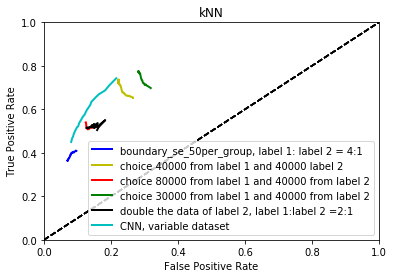

In [110]:
plt.title("kNN")
plot_roc_curve(fpr_list_50pergroup,tpr_list_50pergroup,color='b',label='boundary_se_50per_group, label 1: label 2 = 4:1 ')
plot_roc_curve(fpr_list_50pergroup_balanced_choice,tpr_list_50pergroup_balanced_choice,color='y',label='choice 40000 from label 1 and 40000 label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice,tpr_list_50pergroup_unbalanced_choice,color='r',label='choice 80000 from label 1 and 40000 from label 2')
plot_roc_curve(fpr_list_50pergroup_unbalanced_choice_2,tpr_list_50pergroup_unbalanced_choice_2,color='g',label='choice 30000 from label 1 and 40000 from label 2')
plot_roc_curve(fpr_list_50pergroup_double,tpr_list_50pergroup_double,color='k',label='double the data of label 2, label 1:label 2 =2:1 ')
plot_roc_curve(fp_list,tp_list,color='c',label='CNN, variable dataset ')
plt.show()

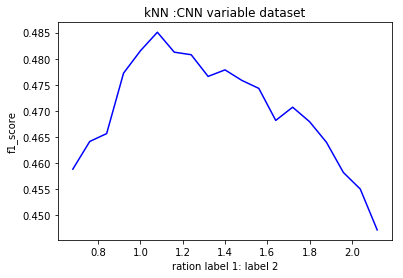

In [111]:
plt.title("kNN :CNN variable dataset")
plt.plot(ratio_list,f1_score_list,"b-")
plt.xlabel('ration label 1: label 2')
plt.ylabel('f1_score')
plt.show()